# Regression

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('D3.csv')  # Read the D3 dataset


In [63]:
# One hot encoding non-ordinal categorical data
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])  

# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

# setting random state
rs = 42

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Columns: 116 entries, Year to WindDir3pm_WSW
dtypes: float64(11), int64(8), uint8(97)
memory usage: 33.8 MB


In [65]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(8):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(8):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 2007.0, max 2017.0, mean 2012.76 and std dev 2.54
Variable #1: min 1.0, max 12.0, mean 6.41 and std dev 3.43
Variable #2: min -8.5, max 33.9, mean 12.18 and std dev 6.39
Variable #3: min -4.8, max 48.1, mean 23.22 and std dev 7.11
Variable #4: min 0.0, max 371.0, mean 2.35 and std dev 8.39
Variable #5: min 0.0, max 145.0, mean 5.48 and std dev 3.14
Variable #6: min 0.0, max 14.5, mean 7.60 and std dev 2.74
Variable #7: min 6.0, max 135.0, mean 39.93 and std dev 13.14
After scaling
-------------
Variable #0: min -2.26365540824716, max 1.666406621665653, mean 0.00 and std dev 1.00
Variable #1: min -1.578348203817151, max 1.6325481308977514, mean 0.00 and std dev 1.00
Variable #2: min -3.2373193861573752, max 3.4000989534120403, mean -0.00 and std dev 1.00
Variable #3: min -3.94316572081535, max 3.5000140598205802, mean -0.00 and std dev 1.00
Variable #4: min -0.27944945390727066, max 43.916202935976834, mean -0.00 and std dev 1.00
Variable #5

In [66]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=42)

# fit it to training data
modelLR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [67]:
# training and test accuracy
print("Train accuracy:", modelLR.score(X_train, y_train))
print("Test accuracy:", modelLR.score(X_test, y_test))

# classification report on test data
y_predLR = modelLR.predict(X_test)
print(classification_report(y_test, y_predLR))

Train accuracy: 0.8475284521812502
Test accuracy: 0.8472319879998125
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.73      0.50      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666



In [68]:
print(modelLR.coef_)

[[ 2.33865637e-02  6.17659691e-02  2.28235453e-01 -5.90099281e-01
   1.75767682e-01 -5.99287946e-03 -2.99017159e-01  7.23936081e-01
  -3.38194278e-02 -1.78754093e-01  1.38082554e-01  1.21553887e+00
   8.53567276e-01 -1.24536733e+00 -1.39121074e-03  2.80378843e-01
   1.96175634e-01  2.74384021e-01  7.86428199e-02  2.61758440e-03
   1.45471468e-02  7.90106881e-02  1.40233299e-02 -4.03613578e-02
   2.97310222e-02  7.84026062e-02 -8.34315317e-03  2.08048128e-02
   6.90774000e-02 -4.77188630e-03 -8.85442260e-03 -8.18659501e-02
  -7.43253019e-02 -8.16534064e-02 -4.04394559e-02 -5.80014511e-02
  -2.85587692e-04 -4.83132081e-02  1.65895876e-02  4.26425867e-02
   2.58847927e-02 -1.80960010e-01 -1.07115243e-02 -1.93332465e-02
  -1.01626193e-01 -4.81384125e-02  1.42506370e-02  6.40489906e-02
   3.90610220e-02  1.06544235e-01  8.72217966e-02  1.32524832e-02
   1.96533550e-02 -3.49840590e-02  4.85167909e-02  2.08551149e-02
  -8.89060674e-03 -9.79841398e-02  2.95024662e-02  1.81304846e-02
   5.63184

In [93]:
feature_names = X.columns
coef = modelLR.coef_[0]

# sort them out in descending order
indicesLR = np.argsort(coef)
#indicesLR = np.flip(indices, axis=0)

for i in indicesLR:
    print(feature_names[i], ':', coef[i])

Pressure3pm : -1.2453673277633261
MaxTemp : -0.5900992812429271
Sunshine : -0.2990171585735449
Location_MountGinini : -0.18096000952526578
WindSpeed3pm : -0.17875409296812797
Location_Wollongong : -0.1379368624110165
Location_NorahHead : -0.10162619274300469
Location_Townsville : -0.09798413980321792
Location_Darwin : -0.08186595010448296
Location_Hobart : -0.08165340639582666
Location_GoldCoast : -0.07432530190573246
WindDir9am_SSE : -0.06410398746370038
WindDir9am_S : -0.059462427775922116
Location_Launceston : -0.05800145105564109
WindDir3pm_SSE : -0.05543586708603808
WindDir9am_SE : -0.04968632808888412
Location_MelbourneAirport : -0.048313208080582475
WindDir3pm_NE : -0.04827083152249209
Location_NorfolkIsland : -0.04813841254102202
WindDir3pm_SW : -0.04424434148289238
Location_Katherine : -0.04043945586542038
Location_Ballarat : -0.04036135777232755
WindGustDir_NE : -0.037400869411849884
WindDir9am_ESE : -0.03613600843238872
Location_Sale : -0.03498405904769131
WindGustDir_NNE : 

In [78]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
LRcv = GridSearchCV(param_grid = params, estimator = LogisticRegression(random_state=42),
                    return_train_score=True, cv=10, n_jobs=-1)
LRcv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", LRcv.score(X_train, y_train))
print("Test accuracy:", LRcv.score(X_test, y_test))

y_predLRcv = LRcv.predict(X_test)
print(classification_report(y_test, y_predLRcv))

# print parameters of the best model
print(LRcv.best_params_)

Train accuracy: 0.8475284521812502
Test accuracy: 0.8472554258660292
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.73      0.50      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666

{'C': 100}


In [72]:
result_set = LRcv.cv_results_
print(result_set)

{'mean_fit_time': array([2.81306038, 2.04151092, 1.83099694, 4.19308195, 6.56024165,
       7.92221336, 7.83044386, 8.21104791, 7.94171541, 6.06978073]), 'std_fit_time': array([0.06112402, 0.53697183, 0.08004792, 0.12779943, 0.19637139,
       0.33044577, 0.34262203, 0.22730268, 0.25117964, 1.28149654]), 'mean_score_time': array([0.01605721, 0.02058051, 0.0172369 , 0.02326012, 0.02299552,
       0.02943177, 0.02730248, 0.02471495, 0.02345114, 0.00959733]), 'std_score_time': array([0.00447819, 0.00250245, 0.0043362 , 0.00606316, 0.00443728,
       0.0180433 , 0.00292553, 0.0033324 , 0.00350884, 0.00533958]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


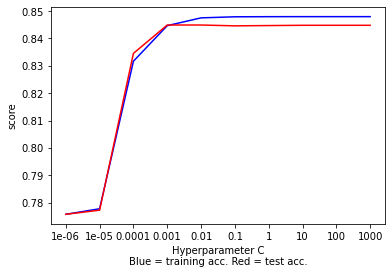

In [73]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


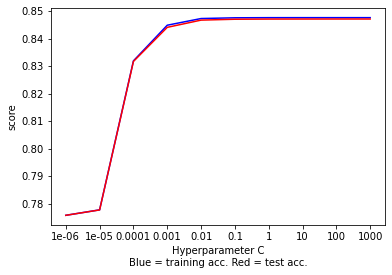

In [74]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [75]:
print(LRcv.best_params_)

{'C': 100}


In [76]:
LRcv.fit(X_train, y_train)

print("Train accuracy:", LRcv.score(X_train, y_train))
print("Test accuracy:", LRcv.score(X_test, y_test))

Train accuracy: 0.8475284521812502
Test accuracy: 0.8472554258660292


In [107]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 115
Number of features after elimination 104


In [108]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [170]:
# grid search CV with X_train_sel and X_test_sel 
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

/Users/chakhochan/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Train accuracy: 0.8476188562876056
Test accuracy: 0.847466366661979
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.73      0.50      0.60      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666

{'C': 1}


In [169]:
for X, y_predrfe, y in zip(X, y_predrfe, y):
    if y_predrfe != y:
        print(X, 'has been classified as ', y_predrfe, 'and should be ', y) 

TypeError: 'int' object is not iterable

In [171]:
feature_names = X.columns
coefrfe = rfe_cv.best_estimator_.coef_[0]
coefrfe = coefrfe[:]
# sort them out in descending order
indicesrfe = np.argsort(coefrfe)
indicesrfe = np.flip(indicesrfe, axis=0)

for i in indicesrfe:
    print(feature_names[i], ':', coefrfe[i])

AttributeError: 'str' object has no attribute 'columns'

In [167]:
y_pred[:10]

IndexError: invalid index to scalar variable.

In [168]:
y_test[:10]

81939     0
77651     0
77475     1
140279    0
36246     0
2694      1
121528    0
37834     0
124031    0
91967     1
Name: RainTomorrow, dtype: int64

In [138]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 15}


In [139]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

Humidity3pm : 0.6211188914585039
WindGustSpeed : 0.11103363152990557
Pressure3pm : 0.08244264099933675
Sunshine : 0.07721192379384567
Rainfall : 0.05660709170408748
MinTemp : 0.006253847516101988
Temp9am : 0.005697105660451695
Temp3pm : 0.005527990083184624
Humidity9am : 0.00437329424897236
Cloud3pm : 0.0031388526573817533
MaxTemp : 0.0026298652262214035
Pressure9am : 0.0019536847500821993
WindSpeed9am : 0.0018163593660443917
Location_Albany : 0.0017969485059378596
Cloud9am : 0.001565595635013647
Location_MountGinini : 0.0015336230032396258
WindDir3pm_W : 0.0015064841339302915
Evaporation : 0.0012282909904146153
WindGustDir_NE : 0.0012240471539562614
Location_NorahHead : 0.001204975335549052


In [140]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(99553, 5)


In [141]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=42), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred_sel = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred_sel))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.836740228822838
Test accuracy: 0.8403646931983312
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33101
           1       0.72      0.47      0.57      9565

    accuracy                           0.84     42666
   macro avg       0.79      0.71      0.73     42666
weighted avg       0.83      0.84      0.83     42666

{'C': 1}


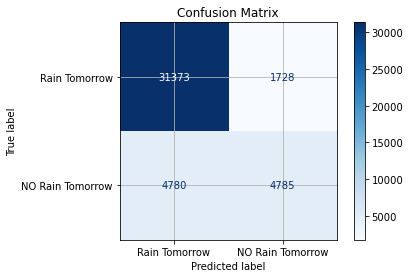

In [104]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import cm

class_names = ["Rain Tomorrow", "NO Rain Tomorrow"]
disp = plot_confusion_matrix(rfe_cv, X_test_sel, y_test, display_labels = class_names, cmap = plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.grid()

In [142]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = modelLR.predict_proba(X_test)
y_pred_proba_lr_cv = LRcv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.8692367653038279
ROC index on test for `cv`: 0.8692355019241036
ROC index on test for `rfe_cv`: 0.8692396110666568
ROC index on test for `cv_sel_model`: 0.8551512657967276


In [143]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

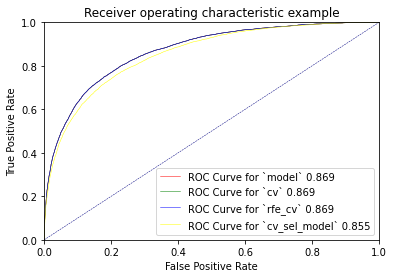

In [144]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [145]:
import pickle
lr_best = cv_sel_model
roc_index_lr_best = roc_index_cv_sel_model
tpr_lr_best = tpr_cv_sel_model
fpr_lr_best = fpr_cv_sel_model
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)